## Import libraries and data

In [3]:
#import libraries
#from pandas import read_csv
#from numpy import set_printoptions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data
filename = './data/heart-disease.csv'
header = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv(filename,names=header)


## Inspect Data


In [19]:
#inspect data
print(df.info())
print(df.describe())
print(df.head(5))
print(df.tail(5))
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.68976

In [25]:
pd.set_option('display.precision',3)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000,303.000,303.000,303.00,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.439,0.680,3.158,131.69,246.693,0.149,0.990,149.607,0.327,1.040,1.601,0.663,4.703,0.937
std,9.039,0.467,0.960,17.60,51.777,0.356,0.995,22.875,0.470,1.161,0.616,0.934,1.971,1.229
min,29.000,0.000,1.000,94.00,126.000,0.000,0.000,71.000,0.000,0.000,1.000,0.000,0.000,0.000
25%,48.000,0.000,3.000,120.00,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,3.000,0.000
50%,56.000,1.000,3.000,130.00,241.000,0.000,1.000,153.000,0.000,0.800,2.000,0.000,3.000,0.000
75%,61.000,1.000,4.000,140.00,275.000,0.000,2.000,166.000,1.000,1.600,2.000,1.000,7.000,2.000
max,77.000,1.000,4.000,200.00,564.000,1.000,2.000,202.000,1.000,6.200,3.000,3.000,7.000,4.000


In [31]:
#implement with onyl numeric 
skew = df.skew(numeric_only=True)
print(skew)

age        -0.209
sex        -0.775
cp         -0.842
trestbps    0.706
chol        1.136
fbs         1.987
restecg     0.020
thalach    -0.537
exang       0.743
oldpeak     1.270
slope       0.508
ca          1.209
thal        0.187
num         1.058
dtype: float64


## Check data types and extact numeric

In [29]:
data_types = df.dtypes
print(data_types)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [26]:
# Select columns with numerical values
numeric_columns = df.select_dtypes(include=np.number)

# Create a new DataFrame with only numerical columns
numeric_df = df[numeric_columns.columns]

# Print the new DataFrame with numerical columns
print("DataFrame with numerical columns:")
print(numeric_df)


DataFrame with numerical columns:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  

In [30]:
#alternative
#generic way to extract number types

numeric_data = df.select_dtypes(include=['number'])
#skewness = numeric_data.skew()
#print(skewness)
print(numeric_data)

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal  num  
0      3.0  0.0   6.0 

## Check for missing / singular


In [21]:
# Check for missing or null values
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Missing values per column:")
print(missing_values)

# Check for columns with only one unique value
single_value_columns = df.columns[df.nunique() == 1]

# Print the columns with only one unique value
print("Columns with only one unique value throughout:")
print(single_value_columns)


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Columns with only one unique value throughout:
Index([], dtype='object')


## quick variance check

In [23]:
# Calculate the variance in each column
column_variances = df.var()

# Print the variance in each column
print("Variance in each column:")
print(column_variances)

# Calculate the variance percentage in each column
column_variances_percent = (df.var() / df.var().sum()) * 100

# Print the variance percentage in each column
print("Variance percentage in each column:")
print(column_variances_percent)



Variance in each column:
age           81.697419
sex            0.218368
cp             0.921841
trestbps     309.751120
chol        2680.849190
fbs            0.126877
restecg        0.989968
thalach      523.265775
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             0.873058
thal           3.884991
num            1.509300
dtype: float64
Variance percentage in each column:
age          2.265574
sex          0.006056
cp           0.025564
trestbps     8.589795
chol        74.343375
fbs          0.003518
restecg      0.027453
thalach     14.510829
exang        0.006120
oldpeak      0.037384
slope        0.010531
ca           0.024211
thal         0.107736
num          0.041855
dtype: float64


## Check feature correlation

            age    sex     cp  trestbps   chol    fbs  restecg  thalach  \
age       1.000 -0.098  0.104     0.285  0.209  0.119    0.149   -0.394   
sex      -0.098  1.000  0.010    -0.064 -0.200  0.048    0.022   -0.049   
cp        0.104  0.010  1.000    -0.036  0.072 -0.040    0.068   -0.334   
trestbps  0.285 -0.064 -0.036     1.000  0.130  0.175    0.147   -0.045   
chol      0.209 -0.200  0.072     0.130  1.000  0.010    0.171   -0.003   
fbs       0.119  0.048 -0.040     0.175  0.010  1.000    0.070   -0.008   
restecg   0.149  0.022  0.068     0.147  0.171  0.070    1.000   -0.083   
thalach  -0.394 -0.049 -0.334    -0.045 -0.003 -0.008   -0.083    1.000   
exang     0.092  0.146  0.384     0.065  0.061  0.026    0.085   -0.378   
oldpeak   0.204  0.102  0.202     0.189  0.047  0.006    0.114   -0.343   
slope     0.162  0.038  0.152     0.117 -0.004  0.060    0.134   -0.386   
ca        0.365  0.086  0.233     0.098  0.124  0.141    0.132   -0.266   
thal      0.128  0.378  0

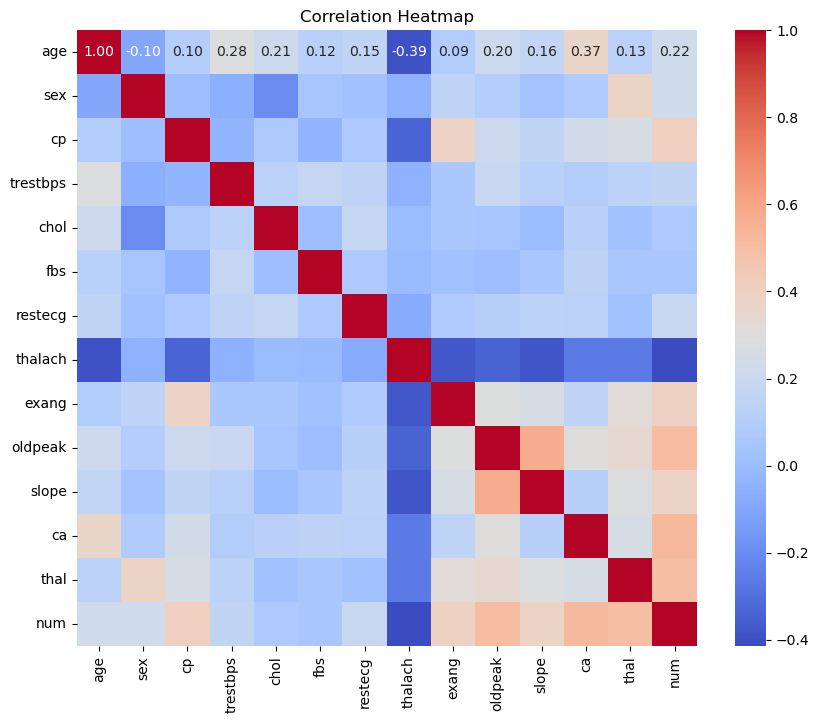

In [35]:
#implement with onyl numeric 
correlations = df.corr(method='pearson', numeric_only=True)
print(correlations)

import seaborn as sns
# Plot heatmap with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

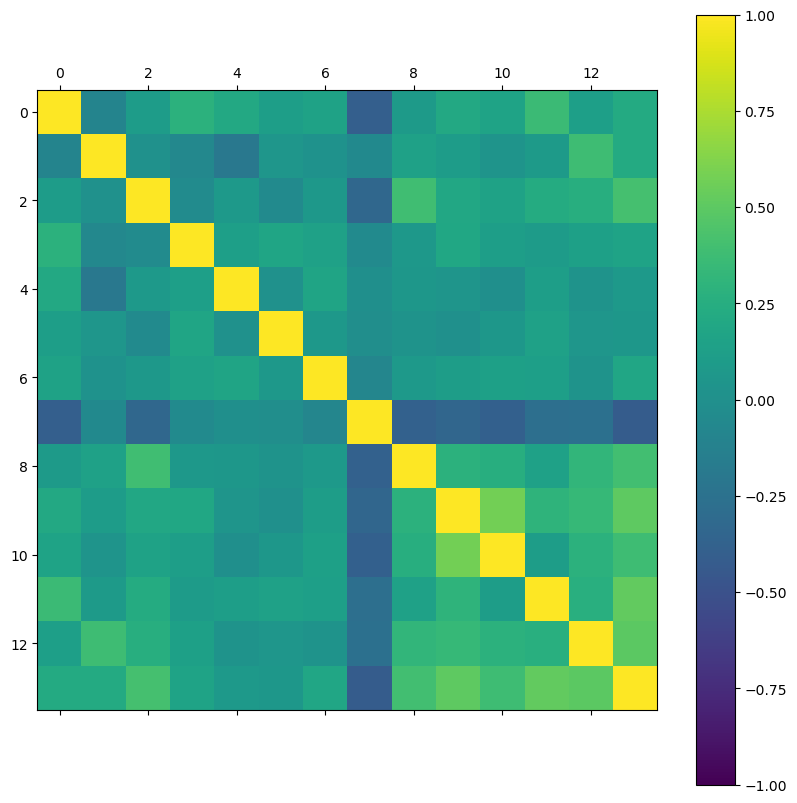

In [38]:
#plot with matplotlib
# Plot correlation matrix
fig = plt.figure(figsize=[10, 10])

ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

plt.show()

## Inspect Correlations

In [37]:
# Filter out self-correlations (diagonal elements)
correlations_filtered = correlations.mask(np.eye(len(correlations), dtype=bool))

# Extract the highest correlations
highest_correlations = correlations_filtered.stack().nlargest(5)

# Extract the lowest correlations
lowest_correlations = correlations_filtered.stack().nsmallest(5)

# Print the highest and lowest correlations
print("Highest correlations (excluding self-correlations):")
print(highest_correlations)
print("\nLowest correlations (excluding self-correlations):")
print(lowest_correlations)



Highest correlations (excluding self-correlations):
oldpeak  slope      0.578
slope    oldpeak    0.578
ca       num        0.521
num      ca         0.521
oldpeak  num        0.504
dtype: float64

Lowest correlations (excluding self-correlations):
thalach  num       -0.415
num      thalach   -0.415
age      thalach   -0.394
thalach  age       -0.394
         slope     -0.386
dtype: float64


## function to print most strongly and negatively correlated variables with target variable

In [44]:
import numpy as np

def get_correlation_with_target(df, target_variable):
    # Calculate correlations with the target variable
    correlations_with_target = df.corrwith(df[target_variable])
    
    # Filter out self-correlation (with the target variable)
    correlations_with_target = correlations_with_target.drop(target_variable)
    
    # Separate positive and negative correlations
    positive_correlations = correlations_with_target[correlations_with_target >= 0]
    negative_correlations = correlations_with_target[correlations_with_target < 0]
    
    # Sort positive correlations in descending order
    sorted_positive_correlations = positive_correlations.sort_values(ascending=False)
    
    # Sort negative correlations in ascending order
    sorted_negative_correlations = negative_correlations.sort_values()
    
    return sorted_positive_correlations, sorted_negative_correlations

# Example usage:
target_variable = "num"  # Specify the target variable
positive_correlations, negative_correlations = get_correlation_with_target(df, target_variable)

# Print attributes most strongly correlated with the target variable
print("Attributes most strongly correlated with", target_variable)
print(positive_correlations.head())

# Print attributes least strongly correlated with the target variable
print("\nAttributes least strongly correlated with", target_variable)
print(positive_correlations.tail())

# Print attributes most strongly negatively correlated with the target variable
print("\nAttributes most strongly negatively correlated with", target_variable)
print(negative_correlations.head())

# Print attributes least strongly negatively correlated with the target variable
print("\nAttributes least strongly negatively correlated with", target_variable)
print(negative_correlations.tail())



Attributes most strongly correlated with num
ca         0.521
oldpeak    0.504
thal       0.498
cp         0.407
exang      0.397
dtype: float64

Attributes least strongly correlated with num
age         0.223
restecg     0.184
trestbps    0.158
chol        0.071
fbs         0.059
dtype: float64

Attributes most strongly negatively correlated with num
thalach   -0.415
dtype: float64

Attributes least strongly negatively correlated with num
thalach   -0.415
dtype: float64


In [40]:
#better way to print in ascending order (all variables, not just target)
print(df.corr().unstack().sort_values().drop_duplicates())

num      thalach   -0.415
thalach  age       -0.394
slope    thalach   -0.386
thalach  exang     -0.378
oldpeak  thalach   -0.343
                    ...  
num      thal       0.498
         oldpeak    0.504
ca       num        0.521
slope    oldpeak    0.578
age      age        1.000
Length: 92, dtype: float64


## Other visualisations to get familiar with data

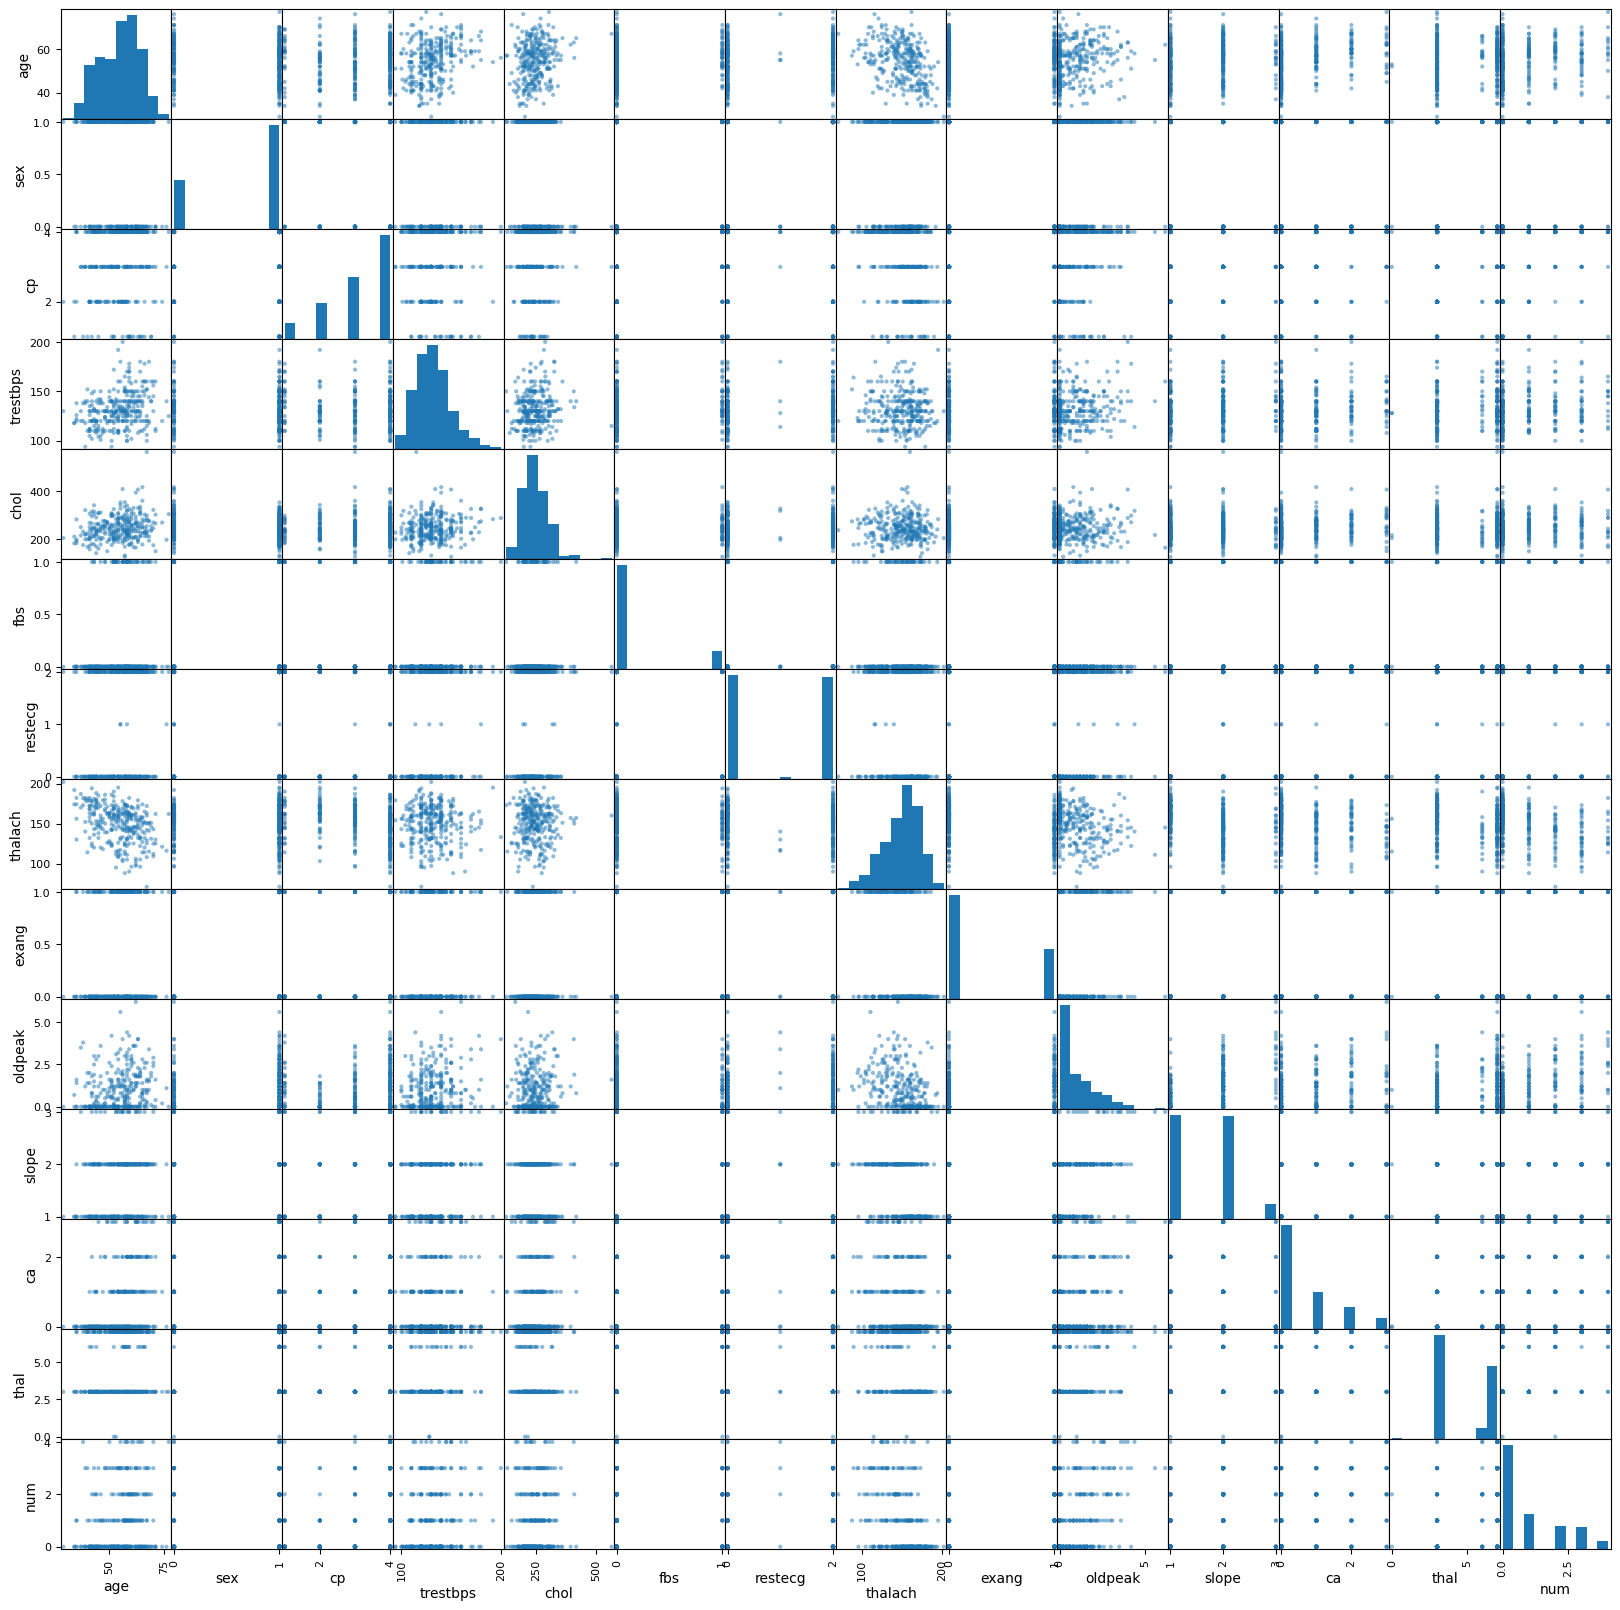

In [39]:
# Scatterplot Matrix using Pandas

pd.plotting.scatter_matrix(df, figsize=[20, 20])

plt.show()

## Feature extraction

In [52]:
# Sklean wants numpy arrays. Convert data
# We have loaded the data previously, so now we extract the values from the Pandas dataframe we set up at the beginning.
import numpy as np

# Convert input features (X) and target variable (Y) to NumPy arrays
X = df.drop(columns=['num']).values  # Convert DataFrame to NumPy array
Y = df['num'].values  # Convert Series to NumPy array

# Print the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)
print(X)
print(Y)
#check wiht different ways of comparing

print(df['num'])
print(df.iloc[:, 13])

Shape of X: (303, 13)
Shape of Y: (303,)
[[63.  1.  1. ...  3.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]
 [67.  1.  4. ...  2.  2.  7.]
 ...
 [57.  1.  4. ...  2.  1.  7.]
 [57.  0.  2. ...  2.  1.  3.]
 [38.  1.  3. ...  1.  0.  3.]]
[0 2 1 0 0 0 3 0 2 1 0 0 2 0 0 0 1 0 0 0 0 0 1 3 4 0 0 0 0 3 0 2 1 0 0 0 3
 1 3 0 4 0 0 0 1 4 0 4 0 0 0 0 2 0 1 1 1 1 0 0 2 0 1 0 2 2 1 0 2 1 0 3 1 1
 1 0 1 0 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 0 0 1 2 3 0 0 0 0 0 0 3 0 2 1 2 3 1
 1 0 2 2 0 0 0 3 2 3 4 0 3 1 0 3 3 0 0 0 0 0 0 0 0 4 3 1 0 0 1 0 1 0 1 4 0
 0 0 0 0 0 4 3 1 1 1 2 0 0 4 0 0 0 0 0 0 1 0 3 0 1 0 4 1 0 1 0 0 3 2 0 0 1
 0 0 2 1 2 0 3 1 2 0 3 0 0 0 1 0 0 0 0 0 3 3 3 0 1 0 4 0 3 1 0 0 0 0 0 0 0
 0 3 1 0 0 0 3 2 0 2 1 0 0 3 2 1 0 0 0 0 0 2 0 2 2 1 3 0 0 1 0 0 0 0 0 0 0
 1 0 3 0 0 4 2 2 2 1 0 1 0 2 0 1 0 0 0 1 0 2 0 3 0 2 4 2 0 0 0 1 0 2 2 1 0
 3 1 1 2 3 1 0]
0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64
0      0
1     

## Split out target class and check distribution


In [45]:
class_counts = df.groupby('num').size()
print(class_counts)

num
0    164
1     55
2     36
3     35
4     13
dtype: int64


## Apply variance thresholding

In [54]:
# Variance
from sklearn.feature_selection import VarianceThreshold

threshold_n=0.95

sel = VarianceThreshold(threshold=(threshold_n* (1 - threshold_n) ))

vt = sel.fit(X)
print(vt.variances_)

[8.14277903e+01 2.17647507e-01 9.18798811e-01 3.08728839e+02
 2.67200150e+03 1.26458190e-01 9.86700650e-01 5.21538825e+02
 2.19978433e-01 1.34364605e+00 3.78481412e-01 8.70176127e-01
 3.87216940e+00]


## Extracting features

### Threshold (simple univariate)

In [58]:
import numpy as np 

# Plot the features that were above the threshold
print(X[:, vt.variances_ > threshold_n])

# Return the index of the features that were kept.
idx = np.where(vt.variances_ > threshold_n)[0]
print(idx)

# Create a mask to show which of our features will be selected
mask = vt.variances_ > threshold_n
print(mask)

mask = mask.tolist()
mask.append(True)

# Extract the relevant features plus the target variable from the original DataFrame
selected_data = df.loc[:, mask]
print(selected_data)


[[ 63.  145.  233.  ... 150.    2.3   6. ]
 [ 67.  160.  286.  ... 108.    1.5   3. ]
 [ 67.  120.  229.  ... 129.    2.6   7. ]
 ...
 [ 57.  130.  131.  ... 115.    1.2   7. ]
 [ 57.  130.  236.  ... 174.    0.    3. ]
 [ 38.  138.  175.  ... 173.    0.    3. ]]
[ 0  3  4  6  7  9 12]
[ True False False  True  True False  True  True False  True False False
  True]
      age  trestbps   chol  restecg  thalach  oldpeak  thal  num
0    63.0     145.0  233.0      2.0    150.0      2.3   6.0    0
1    67.0     160.0  286.0      2.0    108.0      1.5   3.0    2
2    67.0     120.0  229.0      2.0    129.0      2.6   7.0    1
3    37.0     130.0  250.0      0.0    187.0      3.5   3.0    0
4    41.0     130.0  204.0      2.0    172.0      1.4   3.0    0
..    ...       ...    ...      ...      ...      ...   ...  ...
298  45.0     110.0  264.0      0.0    132.0      1.2   7.0    1
299  68.0     144.0  193.0      0.0    141.0      3.4   7.0    2
300  57.0     130.0  131.0      0.0    115.0   

### Chi-squared (univariate)

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

# summarise scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)

# summarise selected features
# Get the mask of successfully selected features
mask = fit.get_support()
print(mask)

# Append True to the mask to represent the target variable column
mask = np.append(mask, True)

# Extract the selected features plus the target variable from the original DataFrame
selected_data = df.loc[:, mask]

# Print the selected data
print(selected_data)


[ 27.923   7.499  16.881  18.87   37.7     6.658  14.058 215.713  41.534
 101.998  10.542 109.867  70.258]
[False False False False False False False  True False  True False  True
 False]
     thalach  oldpeak   ca  num
0      150.0      2.3  0.0    0
1      108.0      1.5  3.0    2
2      129.0      2.6  2.0    1
3      187.0      3.5  0.0    0
4      172.0      1.4  0.0    0
..       ...      ...  ...  ...
298    132.0      1.2  0.0    1
299    141.0      3.4  2.0    2
300    115.0      1.2  1.0    3
301    174.0      0.0  1.0    1
302    173.0      0.0  0.0    0

[303 rows x 4 columns]


### Backward Selection (RFE)

In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='liblinear')

rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)

print("Num Features: %d" % fit.n_features_)
print("The feature labels: %s " % header[:13])
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


mask = fit.support_
mask = np.append(mask, True)
print(mask)

selected_data = df.loc[:,mask]
print(selected_data)


selected_feature_labels = np.array(header[:13])[mask]
print(selected_feature_labels)



##print("Selected Features and their Headers:")
#print(selected_data)
#print("Selected Feature Labels:", selected_feature_labels)

Num Features: 3
The feature labels: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 
Selected Features: [False  True False False False False False False  True False False  True
 False]
Feature Ranking: [ 8  1  4 10 11  2  5  9  1  3  6  1  7]
[False  True False False False False False False  True False False  True
 False  True]
     sex  exang   ca  num
0    1.0    0.0  0.0    0
1    1.0    1.0  3.0    2
2    1.0    1.0  2.0    1
3    1.0    0.0  0.0    0
4    0.0    0.0  0.0    0
..   ...    ...  ...  ...
298  1.0    0.0  0.0    1
299  1.0    0.0  2.0    2
300  1.0    1.0  1.0    3
301  0.0    0.0  1.0    1
302  1.0    0.0  0.0    0

[303 rows x 4 columns]


### Principal Component Analysis

In [93]:
# Feature Extraction with PCA
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

# summarize components
print(fit.components_)
print("Explained Variance: %s" % fit.explained_variance_ratio_)

# Original dimensions
print(df.shape)

# Reduced dimensions
print(fit.components_.shape)


[[ 3.841e-02 -1.809e-03  1.346e-03  5.047e-02  9.980e-01  9.355e-05
   3.340e-03 -3.764e-03  5.748e-04  1.155e-03 -3.195e-06  2.303e-03
   1.093e-03]
 [ 1.806e-01  8.614e-04  1.340e-02  1.053e-01 -1.607e-02  4.545e-04
   4.133e-03 -9.771e-01  7.558e-03  1.794e-02  1.041e-02  1.148e-02
   2.327e-02]
 [ 1.272e-01 -1.222e-03 -5.325e-03  9.816e-01 -5.409e-02  3.620e-03
   6.433e-03  1.306e-01 -1.042e-04  8.955e-03  2.184e-03  2.973e-03
   1.050e-02]]
Explained Variance: [0.746 0.15  0.085]
(303, 14)
(3, 13)


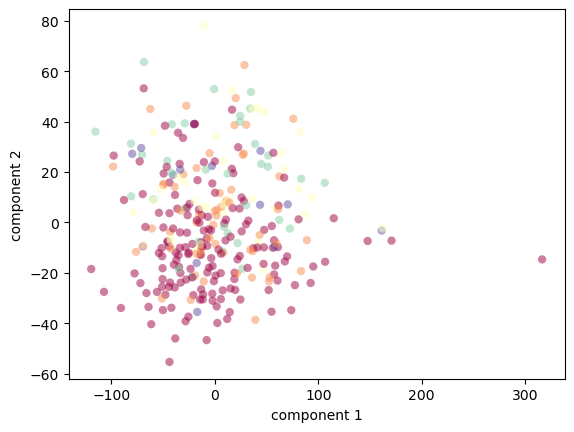

In [95]:
import matplotlib.pyplot as plt
import matplotlib

pca = PCA(n_components=2)

projected = pca.fit_transform(X)

plt.scatter(projected[:, 0], projected[:, 1],
            c=df['num'], edgecolor='none', alpha=0.5,
            cmap = matplotlib.colormaps['Spectral'])
            #cmap=plt.cm.get_cmap('Spectral', 2))



plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

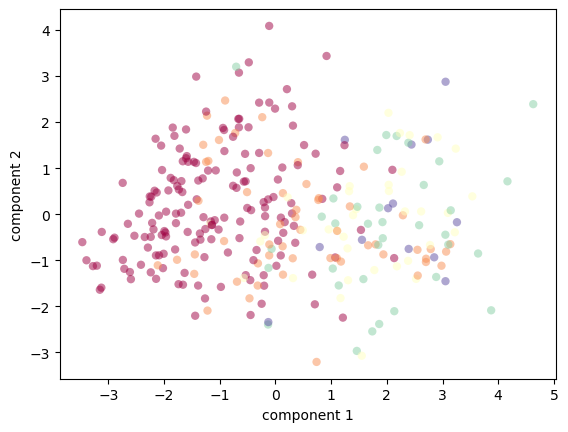

In [96]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2)

X_standardised =  StandardScaler().fit_transform(X)

projected = pca.fit_transform(X_standardised)

plt.scatter(projected[:, 0], projected[:, 1],
            c=df['num'], edgecolor='none', alpha=0.5,
            cmap = matplotlib.colormaps['Spectral'])
            #cmap=plt.cm.get_cmap('Spectral', 2))

plt.xlabel('component 1')
plt.ylabel('component 2')

plt.show()

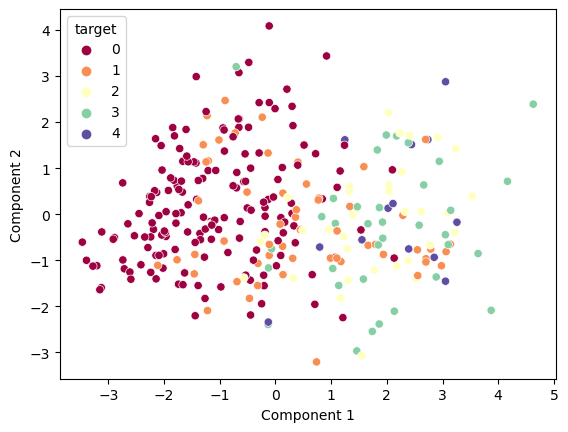

[[ 0.288  0.111  0.285  0.166  0.093  0.08   0.151 -0.389  0.333  0.398
   0.355  0.309  0.342]
 [ 0.417 -0.452 -0.147  0.378  0.437  0.2    0.268  0.047 -0.211 -0.064
  -0.084  0.155 -0.269]]


In [99]:
#same, but with seaborn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Standardize the features
X_standardised = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(X_standardised)

# Create a DataFrame for the projected data
projected_df = pd.DataFrame(data=projected, columns=['component 1', 'component 2'])

# Combine with the target variable
projected_df['target'] = df['num']

# Plot with Seaborn
sns.scatterplot(data=projected_df, x='component 1', y='component 2', hue='target', palette='Spectral')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

print(pca.components_)


[[ 3.841e-02 -1.809e-03  1.346e-03  5.047e-02  9.980e-01  9.355e-05
   3.340e-03 -3.764e-03  5.748e-04  1.155e-03 -3.195e-06  2.303e-03
   1.093e-03]
 [ 1.806e-01  8.614e-04  1.340e-02  1.053e-01 -1.607e-02  4.545e-04
   4.133e-03 -9.771e-01  7.558e-03  1.794e-02  1.041e-02  1.148e-02
   2.327e-02]]
     age        sex     cp  trestbps   chol        fbs  restecg  thalach  \
0  0.038 -1.809e-03  0.001     0.050  0.998  9.355e-05    0.003   -0.004   
1  0.181  8.614e-04  0.013     0.105 -0.016  4.545e-04    0.004   -0.977   

       exang  oldpeak      slope     ca   thal  
0  5.748e-04    0.001 -3.195e-06  0.002  0.001  
1  7.558e-03    0.018  1.041e-02  0.011  0.023  


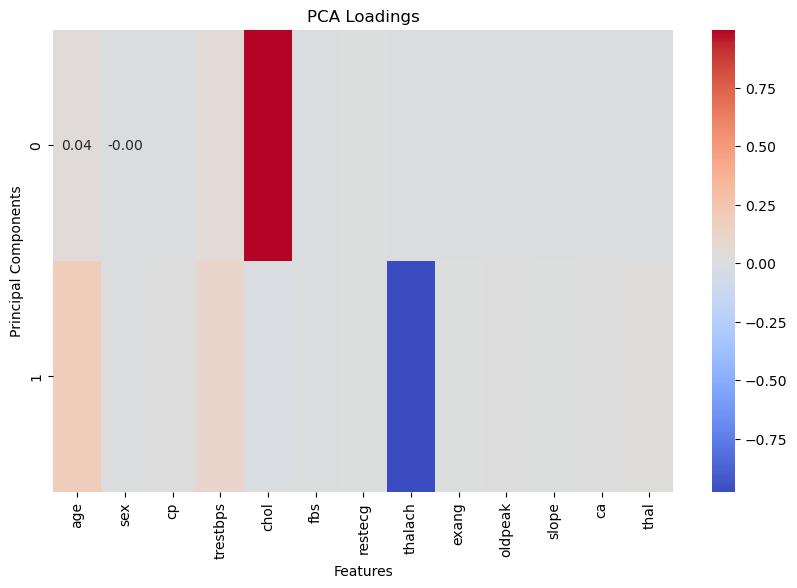

In [100]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)

# Get the principal components
components = pca.components_

# Create a DataFrame to hold the principal components
components_df = pd.DataFrame(components, columns=df.columns[:-1])

print(pca.components_)
print(components_df)
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(components_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.title('PCA Loadings')
plt.show()



In [4]:


X = df.drop(columns=['num']).values  # Convert DataFrame to NumPy array
Y = df['num'].values 

In [9]:
from sklearn.ensemble import RandomForestClassifier

seed = 7

model = RandomForestClassifier(random_state=seed)
model.fit(X, Y)

print(model.feature_importances_)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold headers and their importance
importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(importance_df)



[0.11188429 0.02837518 0.07865557 0.10162689 0.11711793 0.01781922
 0.02696682 0.1350775  0.0505172  0.11517234 0.04433264 0.10175732
 0.07069711]
     Feature  Importance
7    thalach    0.135077
4       chol    0.117118
9    oldpeak    0.115172
0        age    0.111884
11        ca    0.101757
3   trestbps    0.101627
2         cp    0.078656
12      thal    0.070697
8      exang    0.050517
10     slope    0.044333
1        sex    0.028375
6    restecg    0.026967
5        fbs    0.017819


In [13]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

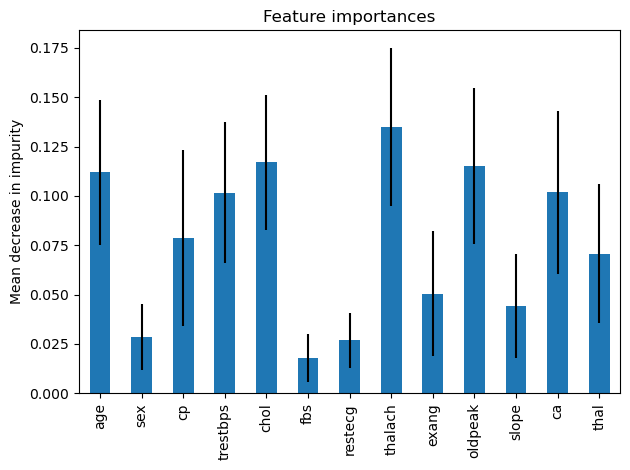

In [14]:
import numpy as np
from matplotlib import pyplot

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(model.feature_importances_, index=features)

fig, ax = pyplot.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()

In [16]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

seed = 7

# feature extraction
model = ExtraTreesClassifier(random_state=seed)
model.fit(X, Y)

print(model.feature_importances_)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold headers and their importance
importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(importance_df)

[0.09613833 0.03921732 0.0766758  0.09079364 0.09507085 0.02866465
 0.04138843 0.10960264 0.06286697 0.10075174 0.05775009 0.1123759
 0.08870364]
     Feature  Importance
11        ca    0.112376
7    thalach    0.109603
9    oldpeak    0.100752
0        age    0.096138
4       chol    0.095071
3   trestbps    0.090794
12      thal    0.088704
2         cp    0.076676
8      exang    0.062867
10     slope    0.057750
6    restecg    0.041388
1        sex    0.039217
5        fbs    0.028665


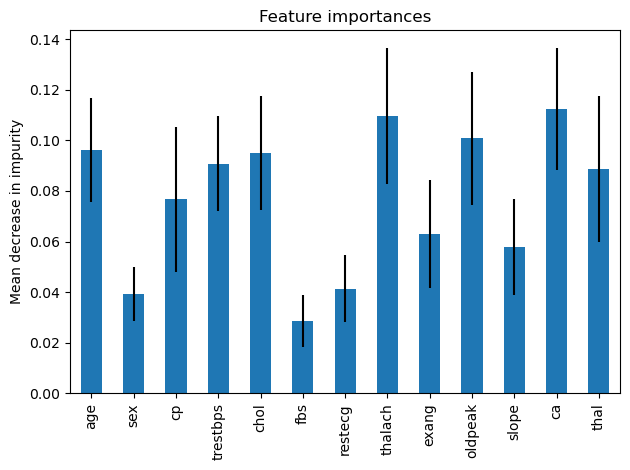

In [17]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(model.feature_importances_, index=features)

fig, ax = pyplot.subplots()

forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()